# Introducción a la Minería de Datos
# Práctica 2: Exploración de datos

## Autor: Alejandro Fuerte Jurado

En esta práctica se realizarán diferentes ejercicio usando el módulo pandas y cualquier otro módulo adicional que se considere, con el objetivo de explorar y analizar distintos datos.

### 1. Obtenga tres ejemplos de ficheros de datos en formato CSV, ARFF u otro cualquiera.
Los datasets escogidos son:
* Breast Cancer Wisconsin (Diagnostic)
* Wine
* Car Evaluation

Obtenidos del siguiente enlace: https://archive.ics.uci.edu/ml/index.php

### 2. Usando Pandas cargue los ficheros y evalúe qué información puede obtener del histograma de atributos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Cargar ficheros
file1 = pd.read_csv('breast_cancer.csv', header=None)
file1.columns = ['id', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 
                 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 
                 'Normal Nucleoli', 'Mitoses', 'Class']

file2 = pd.read_csv('wine.csv', header=None)
file2.columns = [ 'class id', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 
                 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 
                 'OD280/OD315', 'Proline']

file3 = pd.read_csv('car.csv', header=None)
file3.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'a']

<ipython-input-2-fec5600fc261>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  file1.hist(ax = ax)


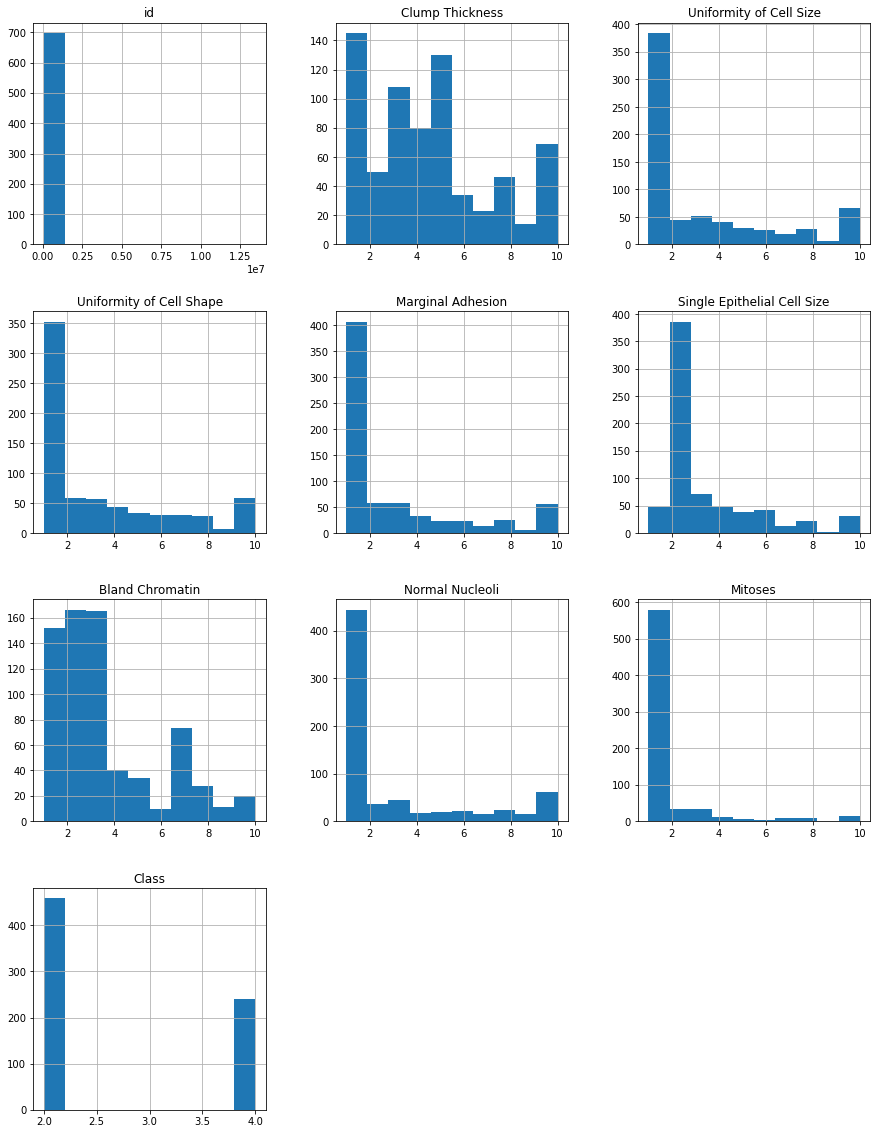

In [2]:
# Histograma de breast cancer
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
file1.hist(ax = ax)
plt.show()

Gracias a los histogramas podemos agrupar los valores de los distintos atributos en grupos, de forma que se pueda ver visualmente de forma más intuitiva los valores que toman los distintos patrones y su relación con los demás. 

En el caso del dataset de cáncer de pulmón, podemos ver un atributo clase que sólo toma dos valores: 2 y 4. Si leemos la información de la base de datos vemos que los patrones con clase 2 tienen como resultado tumor benigno, mientras que los de clase 4 tienen tumor maligno. En el datagrama podemos ver que la mayoría de los patrones se sitúan en la primera clase.

El resto de atributos podemos ver que contienen valores entre 0 y 10, exceptuando el primero, que se trata del atributo identificador de los patrones.

<ipython-input-3-bb6f5feb4b66>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  file2.hist(ax = ax)


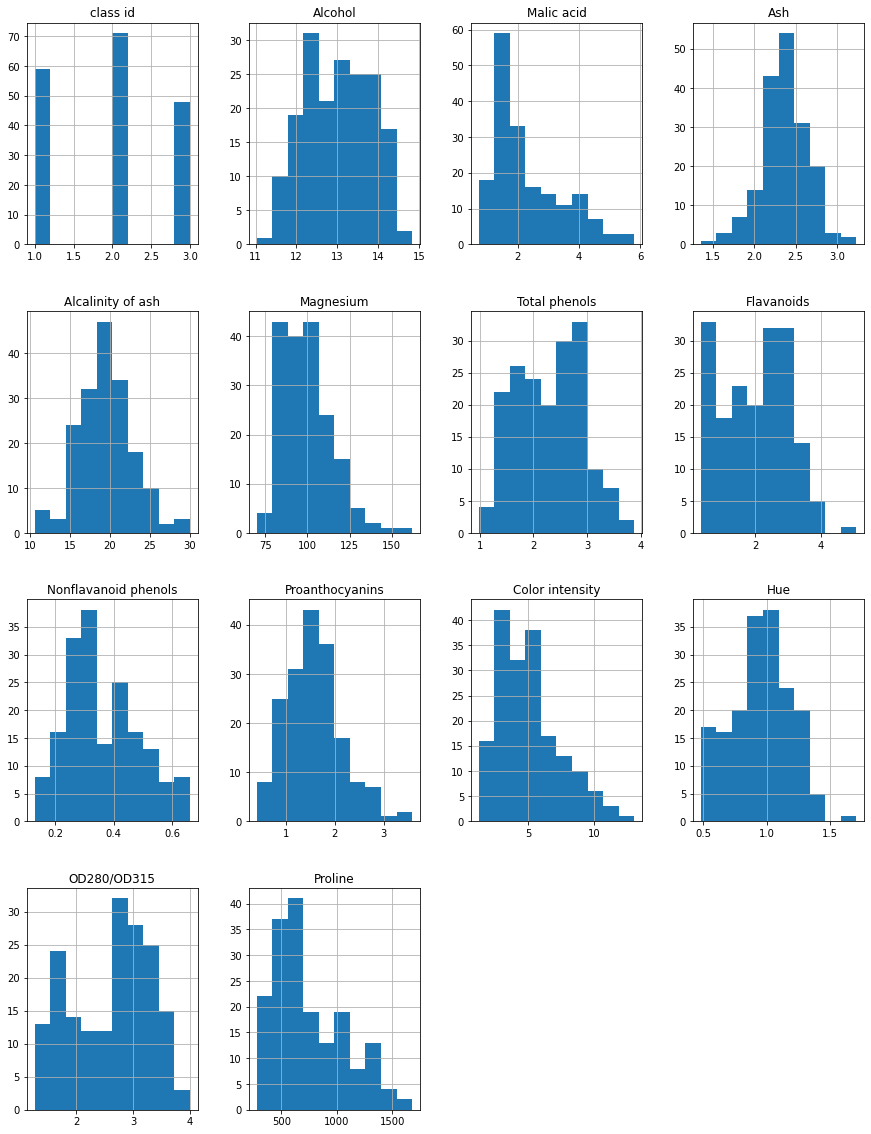

In [3]:
# Histograma de wine
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
file2.hist(ax = ax)
plt.show()

En el caso del dataset de vinos vemos que existen tres clases, la clase 1, la clase 2 y la clase 3. De estas, la segunda es la más abundante, mientras que la tercera es la que contiene menos patrones.

En este caso los rangos de los atributos varían un poco. Por ejemplo el atributo de alcohol contiene valores entre 11 y 15.

In [5]:
# Histograma de car evaluation
file3.hist()
plt.show()

ValueError: hist method requires numerical columns, nothing to plot.

Cuando intentamos crear un histograma para el dataset de coches nos da error. Esto es porque algunos de los atributos no son númericos. Por tanto, no tienen orden, por lo que no pueden ser representados en un histograma. Vamos a echar un vistazo al dataset:

In [6]:
file3

buying  maint  doors persons lug_boot safety      a
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]

Como vemos, contiene los atributos de número de puertas y número de personas, que lógicamente son numéricos. Sin embargo, el resto de atributos contienen valores nominales. Por ejemplo, los dos primeros atributos pueden tener los valores v-high, high, med o low.

### 3. Estudie el efecto de la normalización (reescalar en el intervalo [0, 1]) y la estandarización (μ = 0, σ = 1) sobre el histograma.

Si añadimos el argumento density a la función de histogramas, el resultado será que la distribución se normalizará, de forma que el area de las barras sea 1. Vamos a aplicarlo al primer dataset:

<ipython-input-7-199d963bbfb7>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  file1.hist(ax = ax, density=True)


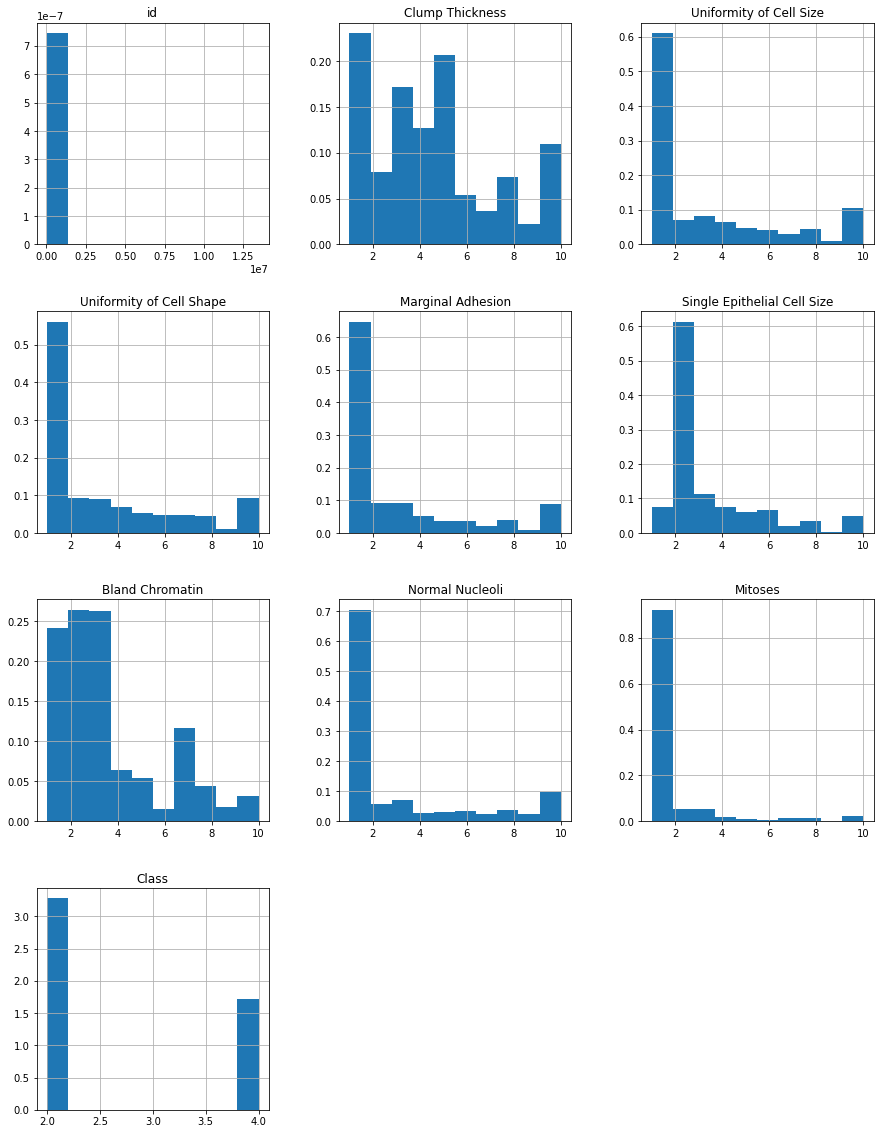

In [7]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
file1.hist(ax = ax, density=True)
plt.show()

### 5. Usando la visualización del diagrama de dispersión (scatter plot) estudie qué información puede obtener de dicha representación gráfica.
De la misma forma que hemos hecho con los histogramas, vamos a analizar los diagramas de dispersión de los tres datasets para ver si nos muestra nueva información interesante.

<ipython-input-8-c91103e0afae>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(file1, ax=ax)


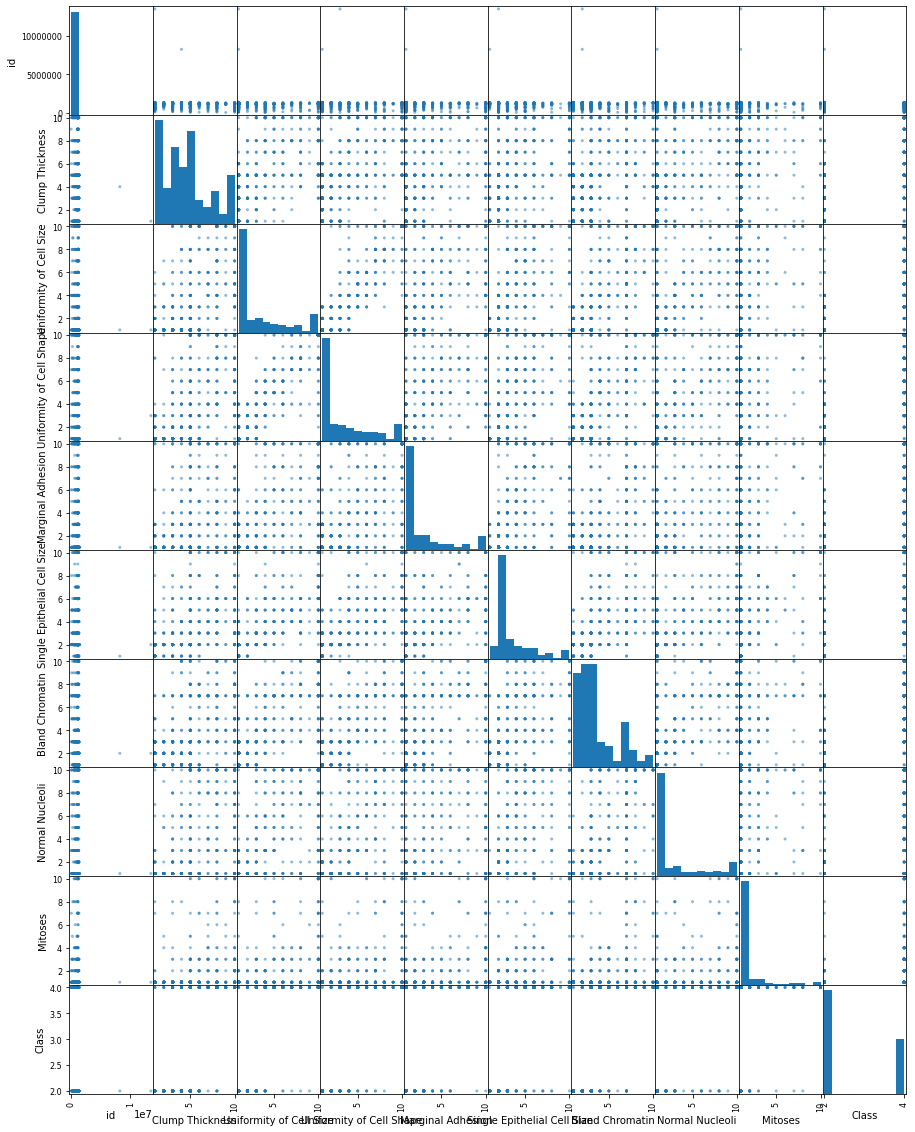

In [8]:
# Diagrama de dispersión de breast cancer
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
pd.plotting.scatter_matrix(file1, ax=ax)
plt.show()

El diagrama del dataset del cáncer de pulmón nos muestra aparentemente una gran dispersión de los datos. Lo que está ocurriendo es que los valores de los atributos que estamos analizando son valores enteros. Es por ello que se muestran como puntos separados en todos los casos.

Sabiendo que tenemos un atributo que nos indica si el patrón tiene o no un tumor maligno, vamos a crear otro tipo de diagrama de dispersión en el que diferenciemos con dos colores entre los patrones de una clase y los patrones de otro. De esta forma, podremos ver si ciertas relaciones de atributos nos proporcionan evidencias de la clasificación final.

In [9]:
import plotly.express as px

plot = px.scatter_matrix(file1, color='Class')
plot.show()

En este diagrama, el color amarillo representa el tumor maligno, mientras que el color azul representa el tumor benigno.

Aunque pudiera parecer que los patrones amarillos abundan más, sabemos que no es cierto por los resultados de los histogramas. Esto nos indica que en el caso de los patrones con tumor maligno, las relaciones de los atributos son más dispersas.

Por otro lado, en el caso de los tumores benignos, podemos ver que las relaciones de los atributos tienden a agruparse más. Concretamente, podemos ver que estas agrupaciones se dan por lo general en valores pequeños de ambos atributos. Esto nos indica que si un patrón tiene valores pequeños en sus atributos, es más probable que su clasificación sea de tumor benigno.

Vamos a echar un vistazo ahora al dataset de vinos.

<ipython-input-10-7570f7dfee39>:4: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



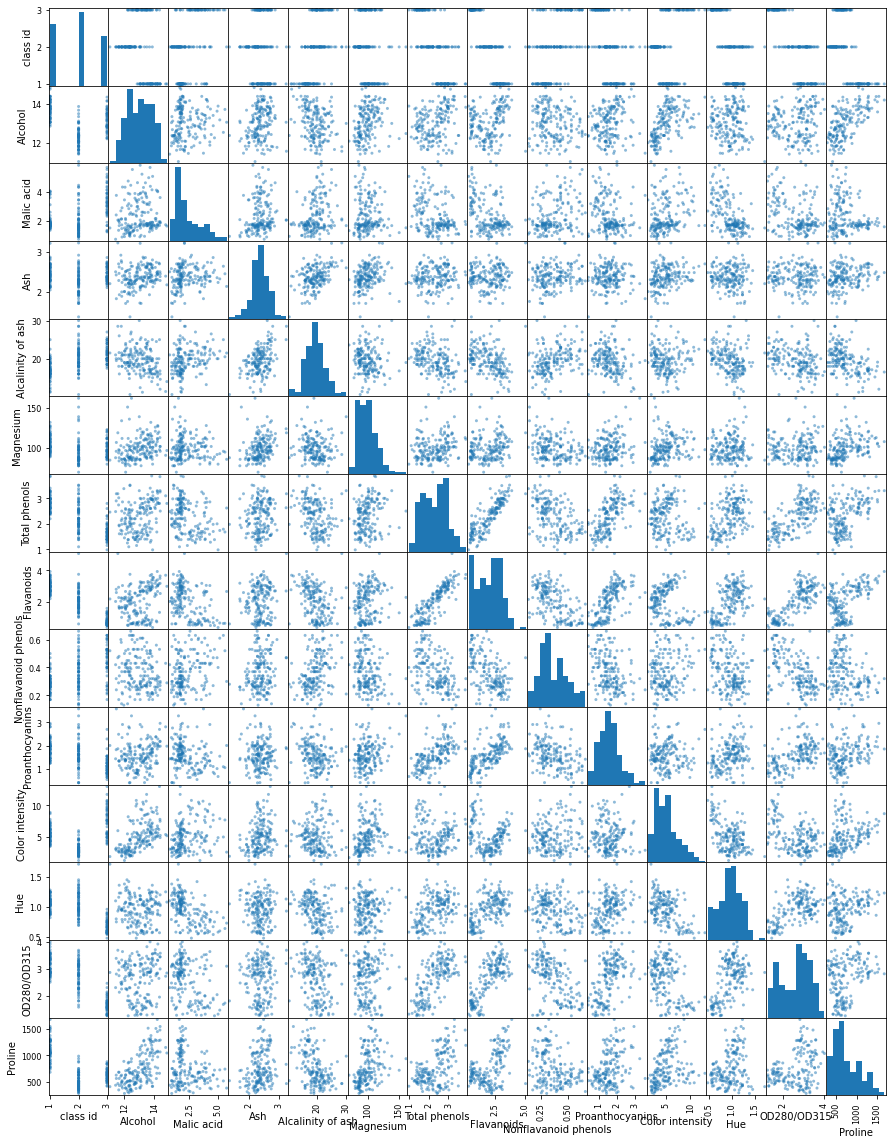

In [10]:
# Diagrama de dispersión de wine
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
pd.plotting.scatter_matrix(file2, ax=ax)
plt.show()

En este caso vemos que, al contrario que en el primer dataset, los valores de los atributos son flotantes, por lo que no existe esa linealidad que encontrábamos anteriormente.

Sabemos que, según el primer atributo, existen tres clases de vino en estos datos. Vamos por tanto a repetir el tipo de diagrama de dispersión que hemos usado con anterioridad.

In [11]:
plot = px.scatter_matrix(file2, color='class id')
plot.show()

En este caso vemos que el color azul representa la clase 1, el color rosa la clase 2, y el color amarillo la clase 3.

Podemos ver que aquí no se aprecia una separación entre clases tan obvia como la del dataset anterior. Quizá se puede llegar a apreciar en las relaciones del atribute Hue con el resto de atributos una tendencia de la clase 3 a tener valores pequeños.

La primera fila nos muestra cómo se dividen los valores de cada atributo en función de la clase. Por ejemplo, la clase 2 es la que tiene los valores más pequeños de alcohol, mientras que la clase uno tiene los valores más altos.

Por otro lado, tampoco podemos realizar este diagrama para el dataset de coches, por la misma razón que en el caso de los histogramas.

### 8. Estudie el diagrama de correlaciones de los tres conjuntos e indique qué información relativa a las diferentes clases puede obtener.
A continuación vamos a obtener los diagramas de correlaciones de los diferentes datasets. Empecemos por el de cáncer de pulmón.

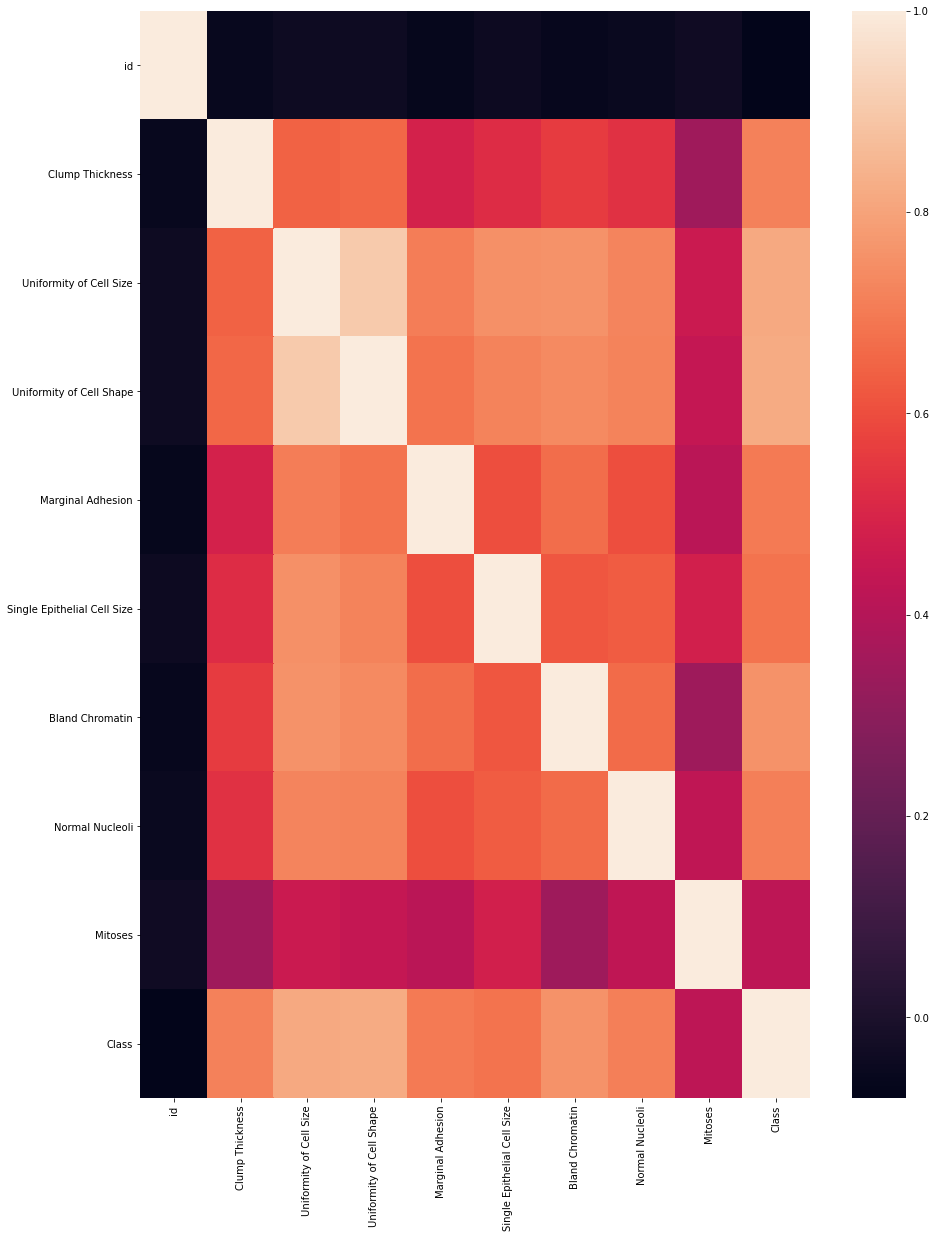

In [12]:
# Matriz de correlación de breast cancer
import seaborn as sns

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
corr = file1.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, ax=ax)
plt.show()

La matriz de correlación evalúa la fuerza y dirección de la relación entre dos variables. De esta forma, un valor de corrección alto (cercano a 1) indica que los elementos miden la misma destreza o característica, y que por tanto están altamente correlacionados.

En este caso podemos encontrar correlaciones altas. El caso más claro es el de la relación entre las variables de uniformidad de la forma de la célula y la uniformidad del tamaño de la célula. Son variables que están altamente correlacionadas, tal y como indica la matriz.

De igual forma, se podría considerar alta la correlación entre la variable clase y las otras dos variables anteriormente mencionadas.

Echemos un vistazo al segundo dataset.

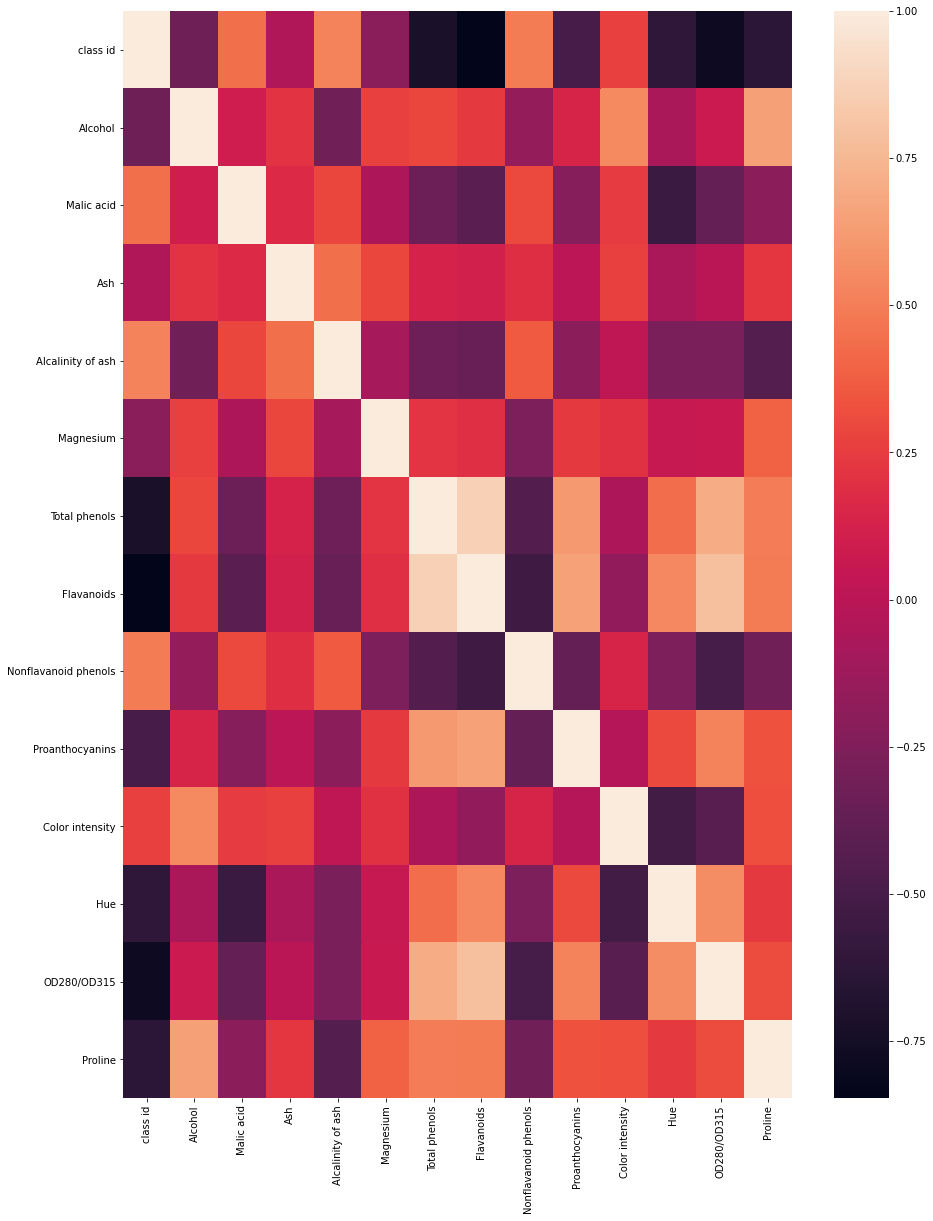

In [13]:
# Matriz de correlación de wine
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
corr = file2.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, ax=ax)
plt.show()

En el dataset de vinos podemos encontrar otras dos variables que están claramente correlacionadas entre sí, y que por tanto miden características relacionadas. Se trata de las variables Flavanoids y Total phenols.

La variable Flavanoids también parece tener una correlación alta con el atributo denominado OD280/OD315.

Por otro lado, el color negro nos muestra variables que no tienen ningún tipo de relación. Es el caso de el id de la clase y, una vez más, la variable Flavanoids.

Una vez más, no podemos aplicar la matriz de correlación a un dataset cuyas variables no son numéricas. Todos los análisis y exploración de datos que se están realizando en esta práctica se basan en datos numéricos, por lo que no es posible utilizar valores nominales.

### 9. Estudie la representación en coordenadas paralelas de los conjuntos e indique qué información relativa a las diferentes clases puede obtener.
Por último, vamos a analizar la representación en coordenadas de los dos datasets numéricos. 

Los gráficos de coordenadas paralelas son ideales para comparar muchas variables y ver las relaciones entre ellas.

Cada variable recibe su propio eje y todos los ejes se colocan en paralelo entre sí, de forma que cada eje pueda tener una escala diferente.

En este caso, el dataset de coches aparentemente sí que podemos utilizarlo para esta representación. Vamos a comprobarlo.

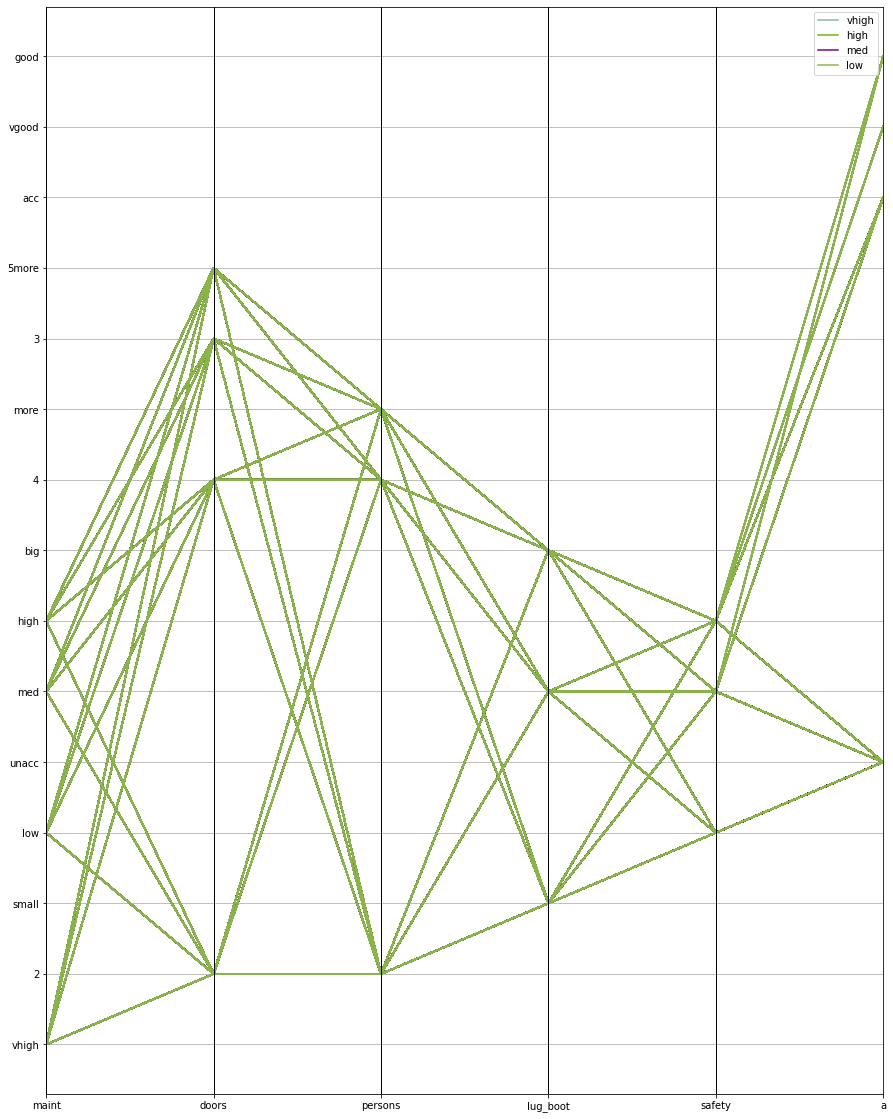

In [14]:
# Representación en coordenadas paralelas de car evaluation
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
pd.plotting.parallel_coordinates(file3, class_column='buying', ax=ax)
plt.show()

Podemos ver que la representación es bastante extraña. Si nos fijamos en los nombres de las filas encontraremos el problema. Se están mezclando valores numéricos con valores nominales, que no tienen orden.

Además, vemos que solo aparecen coches de clase vhigh. Esto se debe a que el resto de patrones con diferente clase tienen los mismos valores, por lo que aparecen por debajo y no se hace diferencia de color. Está claro que este dataset da muchos problemas para realizar análisis de datos de este tipo.

Vamos a probar entonces con la base de datos de vinos.

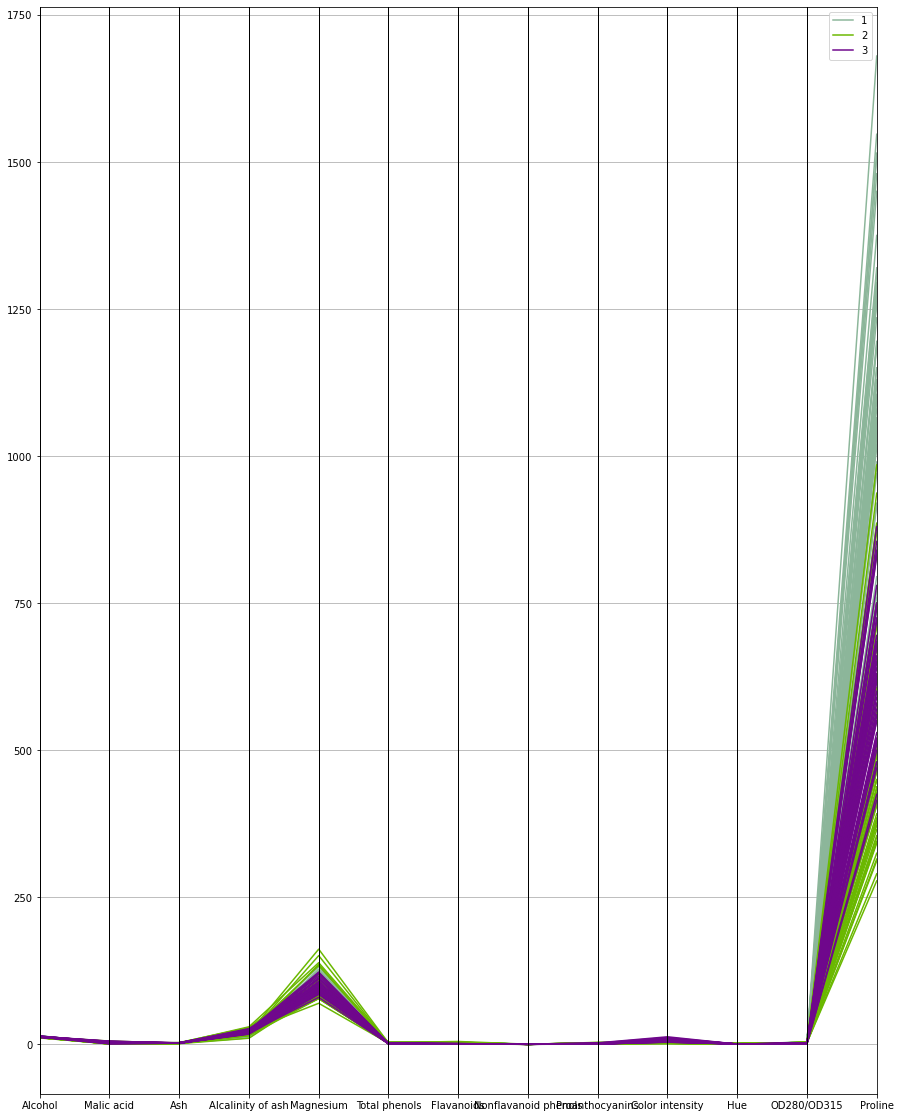

In [15]:
# Representación en coordenadas paralelas de wine
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
pd.plotting.parallel_coordinates(file2, class_column='class id', ax=ax)
plt.show()

Aquí sí que vemos una representación más visual y que tiene más sentido.

Aparentemente no se aprecia una diferenciación concreta entre las tres clases. Esto se corresponde con lo analizado en el diagrama de dispersión realizado con anterioridad. En el caso del atributo de magnesio se puede ver que la clase 2 toma valores más altos que el resto.

De la misma forma, en el caso de la variable Proline vemos que la clase uno contiene valores mucho más altos que la clase 2 y la clase 3, siendo esta última la que tiene los valores más pequeños.

En el resto de las variables no se puede apreciar nueva información relevante, al menos en esta representación de coordenadas paralelas.